In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plt.style.use('classic')


In [2]:
base = "https://raw.githubusercontent.com/pathstream-curriculum/Python/master/"
retail_features = "retail_features_4stores.csv"
retail_sales = "retail_sales_4stores.csv"

In [3]:
retail_sales_df = pd.read_csv(base + retail_sales)
retail_features_df = pd.read_csv(base + retail_features)

In [4]:
# convert Date to datetime
retail_sales_df["Date"] = pd.to_datetime(retail_sales_df.Date)
retail_features_df["Date"] = pd.to_datetime(retail_sales_df.Date)
# convert Store and Dept to string
retail_sales_df["Store"] = retail_sales_df.Store.astype("str")
retail_sales_df["Dept"] = retail_sales_df.Dept.astype("str")
retail_features_df["Store"] = retail_features_df.Store.astype("str")

#deal with the sorting issue up front
retail_sales_df.sort_values("Date", inplace=True)
retail_features_df.sort_values("Date", inplace=True)

# Subplots

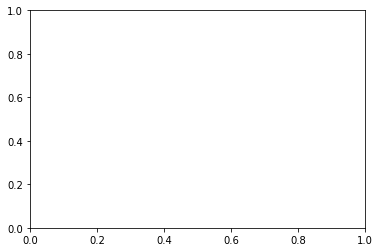

In [5]:
# what happens when you call plt.subplots()?
fig, ax = plt.subplots()

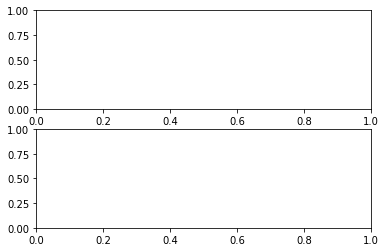

In [6]:
# what if you ask for two subplots?
fig, axs = plt.subplots(2)

In [7]:
# this will be similar to what we did in the last lesson when we put a bunch of lines on the same plot, 
# but this time we're going to put them all on different plots. 

In [8]:
retail_sales_df.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday
1178,10278,2,1,2010-01-10,27023.35,False
1607,10707,2,4,2010-01-10,44705.44,False
4038,30124,4,5,2010-01-10,41979.23,False
2894,21088,3,5,2010-01-10,7001.48,False
1750,10850,2,5,2010-01-10,29935.83,False


In [9]:
def get_dept(sales_df, dept, store=1):
    dept = str(dept)
    store = str(store)
    store_and_dept_df = sales_df.loc[sales_df["Store"]==store].loc[sales_df["Dept"]==dept]

    store_and_dept_sorted = store_and_dept_df.sort_values("Date")
    return store_and_dept_sorted
    

In [10]:
# create 4 new dfs, one for each of 4 depts (all store 1)
s1d1 = get_dept(retail_sales_df, 1)
s1d2 = get_dept(retail_sales_df, 2)
s1d3 = get_dept(retail_sales_df, 3)
s1d4 = get_dept(retail_sales_df, 4)


In [11]:
s1d1.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday
34,34,1,1,2010-01-10,20094.19,False
8,8,1,1,2010-02-04,57258.43,False
21,21,1,1,2010-02-07,16333.14,False
2,2,1,1,2010-02-19,41595.55,False
3,3,1,1,2010-02-26,19403.54,False


/Users/caldermyers/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


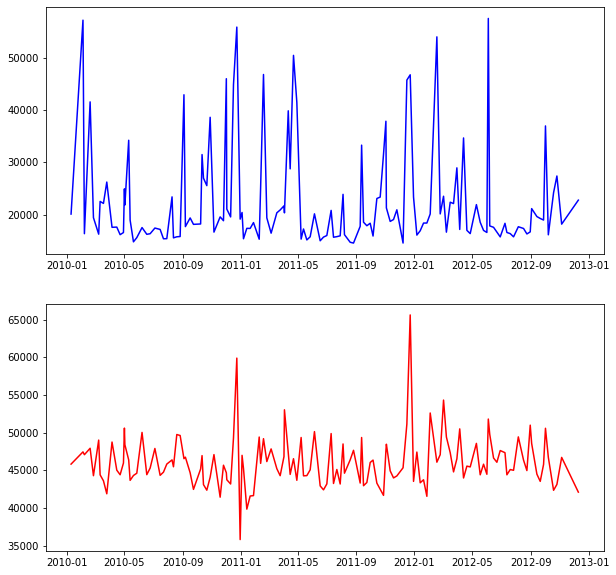

In [12]:
# we can make stacked subplots by passing the number of plots we want to plt.subplots
fig, axs = plt.subplots(2, figsize=(10,10))
# then, we have to call the axes with indexes
axs[0].plot(s1d1["Date"], s1d1["Weekly_Sales"], c="b")
axs[1].plot(s1d2["Date"], s1d2["Weekly_Sales"], c="r")

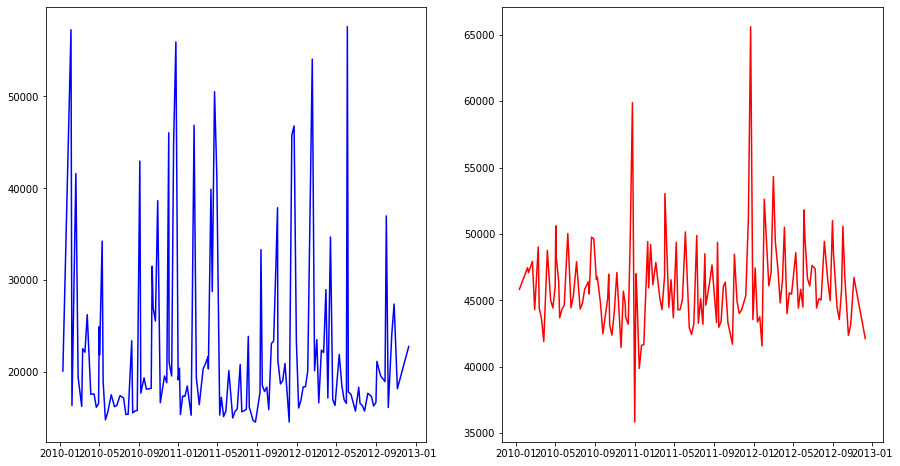

In [13]:
# side by side subplots 
# we can make stacked subplots by passing the number of plots we want to plt.subplots
fig, axs = plt.subplots(1, 2, figsize=(15,8))
# then, we have to call the axes with indexes
axs[0].plot(s1d1["Date"], s1d1["Weekly_Sales"], c="b")
axs[1].plot(s1d2["Date"], s1d2["Weekly_Sales"], c="r")

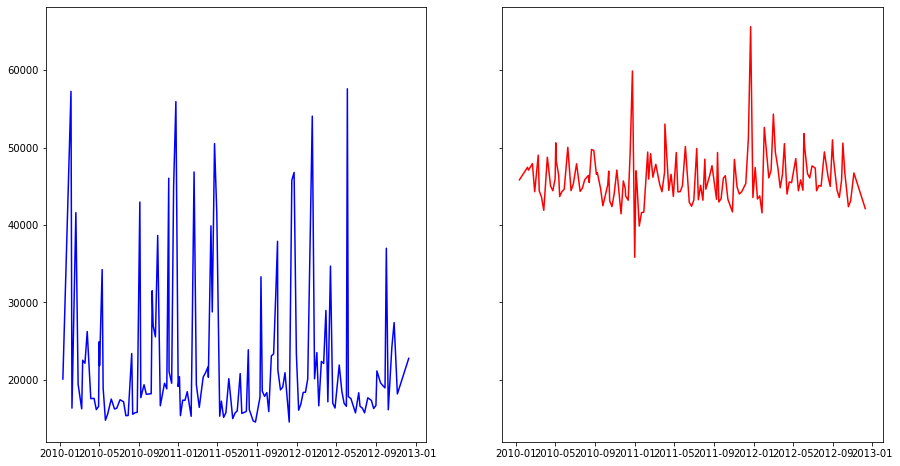

In [14]:
# this makes us realize we need the y axes to match if we're doing to accurately compare
fig, axs = plt.subplots(1, 2, True, True, figsize=(15,8))

# then, we have to call the axes with indexes
axs[0].plot(s1d1["Date"], s1d1["Weekly_Sales"], c="b")
axs[1].plot(s1d2["Date"], s1d2["Weekly_Sales"], c="r")


(0, 70000)

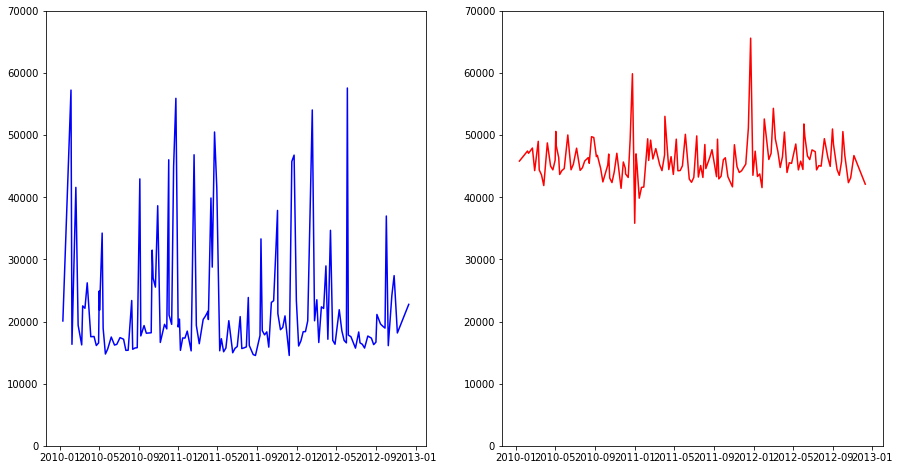

In [15]:
# This is a different way to set the y-axis to be the same. You need to know or compute in advance 
# how high you need the y-axis to go, but this way you get the y-axis on both plots. 

fig, axs = plt.subplots(1, 2, figsize=(15,8))
ylim = (0, 70000)
# then, we have to call the axes with indexes
axs[0].plot(s1d1["Date"], s1d1["Weekly_Sales"], c="b")
axs[0].set_ylim(ylim)
axs[1].plot(s1d2["Date"], s1d2["Weekly_Sales"], c="r")
axs[1].set_ylim(ylim)

Text(0.5, 1.0, 'Dept 4')

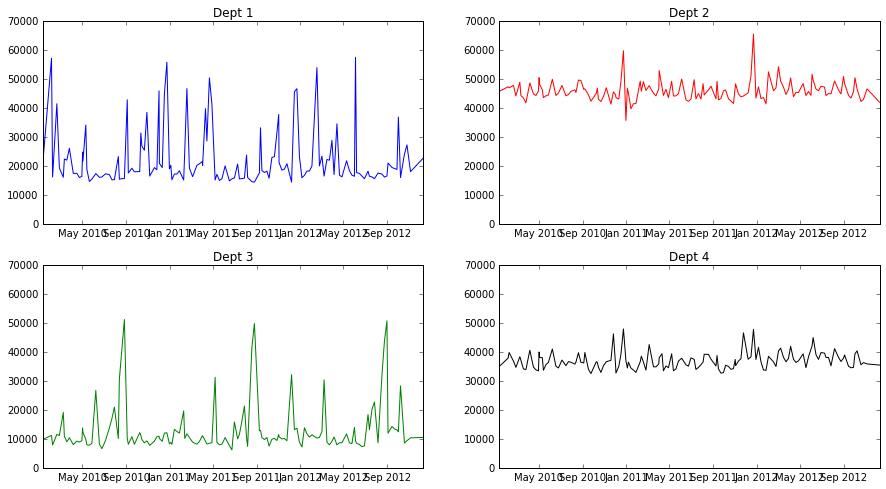

In [39]:
# Finally, we can create a grid of subplots 
# now we need to refer to the axs by row and column

fig, axs = plt.subplots(2, 2, figsize=(15,8))
ylim = (0, 70000)
# then, we have to call the axes with indexes
axs[0,0].plot(s1d1["Date"], s1d1["Weekly_Sales"], c="b")
axs[0,0].set_ylim(ylim)
axs[0,0].set_title("Dept 1")

axs[0,1].plot(s1d2["Date"], s1d2["Weekly_Sales"], c="r")
axs[0,1].set_ylim(ylim)
axs[0,1].set_title("Dept 2")

axs[1,0].plot(s1d3["Date"], s1d3["Weekly_Sales"], c="g")
axs[1,0].set_ylim(ylim)
axs[1,0].set_title("Dept 3")

axs[1,1].plot(s1d4["Date"], s1d4["Weekly_Sales"], c="k")
axs[1,1].set_ylim(ylim)
axs[1,1].set_title("Dept 4")